<a href="https://colab.research.google.com/github/doaa450/Complete-Python-3-Bootcamp/blob/master/Air_Plane_Passengers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [ ]:
def create_dataset(dataset, lookback=1):
    dataX = []
    dataY = []
    for i in range(len(dataset) - lookback - 1):
        a = dataset[i: (i+lookback), 0]
        dataX.append(a)
        dataY.append(dataset[i+lookback,0])
    return np.array(dataX), np.array(dataY)

In [ ]:
!gdown --id "1HrjgPIdJnZNHnYeBRwX0jN7EiMqV-6Gm"
!unzip "international-airline-passengers.zip"

Downloading...
From: https://drive.google.com/uc?id=1HrjgPIdJnZNHnYeBRwX0jN7EiMqV-6Gm
To: /content/international-airline-passengers.zip
100% 783/783 [00:00<00:00, 1.42MB/s]
Archive:  international-airline-passengers.zip
  inflating: international-airline-passengers.csv  


In [ ]:
data = "./international-airline-passengers.csv"

np.random.seed(7)

df = pd.read_csv(data, usecols=[1])
df = df.dropna()
dataset = df.values
dataset = dataset.astype("float32")

scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)

train_dataset = dataset[:int(len(dataset)*0.7), :] # 70 % Training
test_dataset = dataset[int(len(dataset)*0.7):, :]  # 30 % Test

lookback = 10
trainX, trainY = create_dataset(train_dataset, lookback)
testX, testY = create_dataset(test_dataset, lookback)

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


In [ ]:
trainX[:5]

array([[[0.01544401, 0.02702703, 0.05405405, 0.04826255, 0.03281853,
         0.05984557, 0.08494207, 0.08494207, 0.06177607, 0.02895753]],

       [[0.02702703, 0.05405405, 0.04826255, 0.03281853, 0.05984557,
         0.08494207, 0.08494207, 0.06177607, 0.02895753, 0.        ]],

       [[0.05405405, 0.04826255, 0.03281853, 0.05984557, 0.08494207,
         0.08494207, 0.06177607, 0.02895753, 0.        , 0.02702703]],

       [[0.04826255, 0.03281853, 0.05984557, 0.08494207, 0.08494207,
         0.06177607, 0.02895753, 0.        , 0.02702703, 0.02123553]],

       [[0.03281853, 0.05984557, 0.08494207, 0.08494207, 0.06177607,
         0.02895753, 0.        , 0.02702703, 0.02123553, 0.04247104]]],
      dtype=float32)

In [ ]:
trainY[:5]

array([0.        , 0.02702703, 0.02123553, 0.04247104, 0.07142857],
      dtype=float32)

In [ ]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, lookback)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=1)


Epoch 1/100
89/89 [==============================] - 0s 5ms/step - loss: 0.0109
Epoch 2/100
89/89 [==============================] - 0s 2ms/step - loss: 0.0046
Epoch 3/100
89/89 [==============================] - 0s 1ms/step - loss: 0.0043
Epoch 4/100
89/89 [==============================] - 0s 1ms/step - loss: 0.0041
Epoch 5/100
89/89 [==============================] - 0s 1ms/step - loss: 0.0042
Epoch 6/100
89/89 [==============================] - 0s 1ms/step - loss: 0.0040
Epoch 7/100
89/89 [==============================] - 0s 1ms/step - loss: 0.0038
Epoch 8/100
89/89 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 9/100
89/89 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 10/100
89/89 [==============================] - 0s 1ms/step - loss: 0.0035
Epoch 11/100
89/89 [==============================] - 0s 1ms/step - loss: 0.0035
Epoch 12/100
89/89 [==============================] - 0s 1ms/step - loss: 0.0035
Epoch 13/100
89/89 [=================

Train Score: 19.69 RMSE
Test Score: 40.23 RMSE


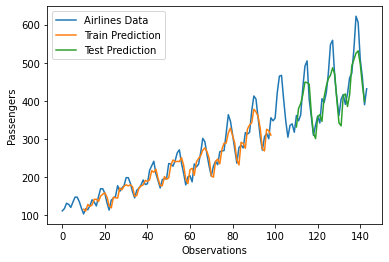

In [ ]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lookback:len(trainPredict)+lookback, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(lookback*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset), label="Airlines Data")
plt.plot(trainPredictPlot, label="Train Prediction")
plt.plot(testPredictPlot, label="Test Prediction")
plt.xlabel("Observations")
plt.ylabel("Passengers")
plt.legend()
plt.show()


